In [80]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt

In [81]:
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

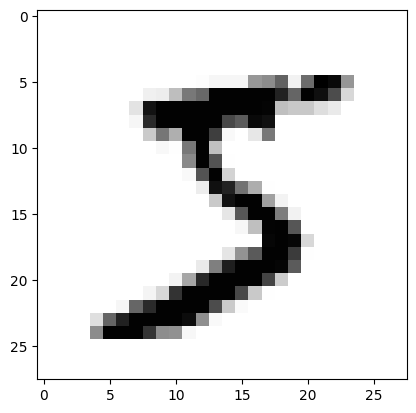

numpy.ndarray

In [82]:
image = x_train[0]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(image, cmap='Greys')
plt.show()

type(image)

In [84]:
scale_factor = 2
image_new_row = []
for i in range(image.shape[0]):  ## iterate row wise
  x_data = np.arange(image.shape[1])
  y_data = image[i]
  x_new_row = np.linspace(0,image.shape[1]-1, scale_factor*image.shape[1] )
  quadratic_interpolation= interp1d(x_data, y_data)
  x_pred= quadratic_interpolation(x_new_row)
  image_new_row.append(x_pred)

image_new_row = np.array(image_new_row)


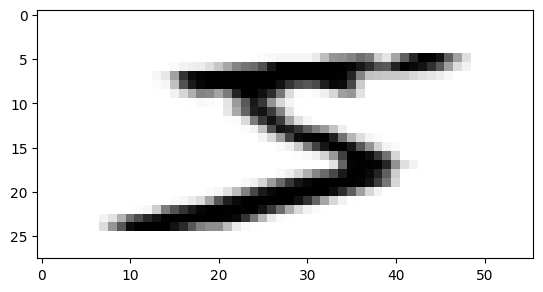

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(np.array(image_new_row), cmap='Greys')
plt.show()

In [86]:
final_image = []
for i in range(image_new_row.shape[1]):  # iterating columnwise
  x_data = np.arange(image_new_row.shape[0])
  y_data = image_new_row.T[i]
  x_new_column = np.linspace(0,image_new_row.shape[0]-1,scale_factor*image_new_row.shape[0])
  quadratic = interp1d(x_data, y_data)
  x_pred = quadratic(x_new_column)
  final_image.append(x_pred)

final_image = np.array(final_image).T

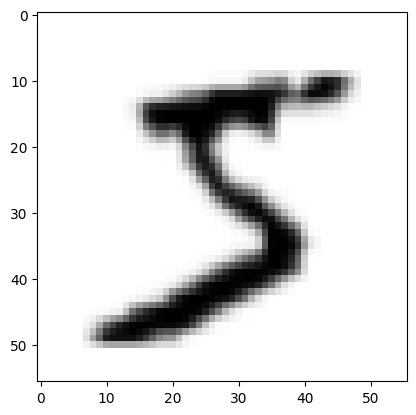

In [89]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(np.array(final_image), cmap='Greys')
plt.show()

## Wrapping it it a single function

In [90]:
def biquadratic_spline_interpolation(image, scale_factor=2):
  image = np.array(image) # Making sure the image is a numpy array , typecasting if not


  # Performing quadratic interpolation on each row, scaling the columns
  image_new_row = []
  for i in range(image.shape[0]):  ## iterate row wise
    x_data = np.arange(image.shape[1])
    y_data = image[i]
    x_new_row = np.linspace(0,image.shape[1]-1, scale_factor*image.shape[1] )
    quadratic_interpolation= interp1d(x_data, y_data)
    x_pred= quadratic_interpolation(x_new_row)
    image_new_row.append(x_pred)

  image_new_row = np.array(image_new_row)


  # Performing quadratic interpolation on each column, scaling the rows
  final_image = []
  for i in range(image_new_row.shape[1]):  # iterating columnwise
    x_data = np.arange(image_new_row.shape[0])
    y_data = image_new_row.T[i]
    x_new_column = np.linspace(0,image_new_row.shape[0]-1,scale_factor*image_new_row.shape[0])
    quadratic = interp1d(x_data, y_data)
    x_pred = quadratic(x_new_column)
    final_image.append(x_pred)

  final_image = np.array(final_image).T

  return final_image


In [91]:
image = x_train[0]

In [94]:
scaled_image = biquadratic_spline_interpolation(image, scale_factor=3)
scaled_image.shape

(84, 84)

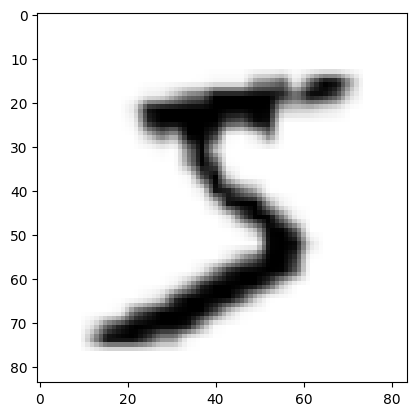

In [95]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(np.array(scaled_image), cmap='Greys')
plt.show()

In [104]:
images = [x_train[i] for i in range(9)]
scaled_images = [biquadratic_spline_interpolation(image, scale_factor=2) for image in images]


## Before Rescaling

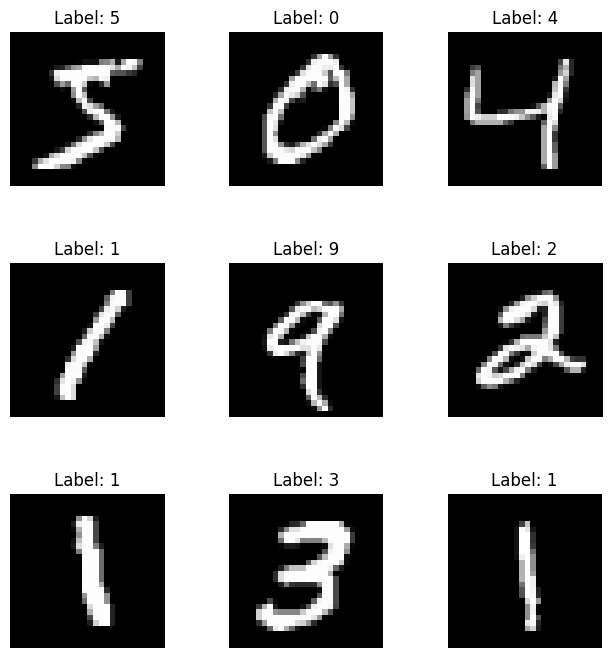

In [105]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
fig.subplots_adjust(hspace=0.5)
# Display images in the subplot
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')

# Show the plot
plt.show()

## After rescaling

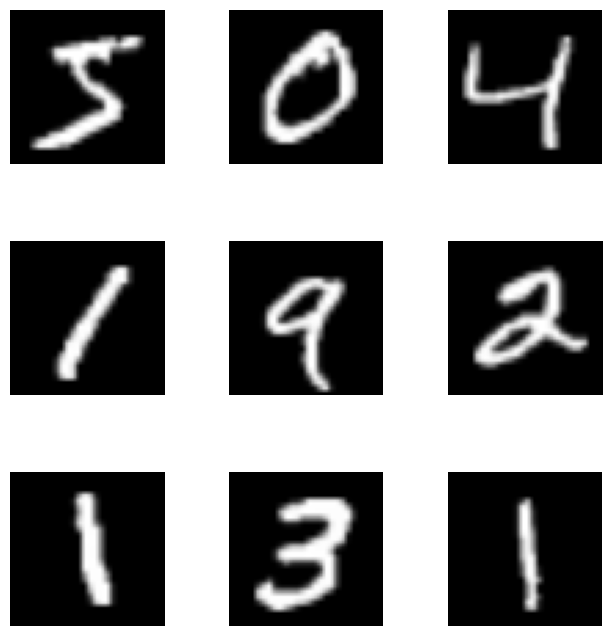

In [106]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
fig.subplots_adjust(hspace=0.5)

# Display images in the subplot
for i, ax in enumerate(axes.flat):
    ax.imshow(scaled_images[i], cmap='gray')
    ax.axis('off')

# Show the plot
plt.show()

